In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



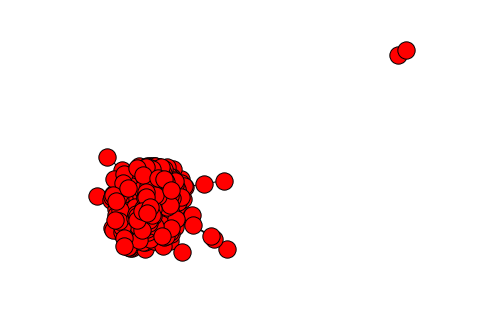

In [4]:
nx.draw(G)

### 1.  Create a nice looking graph of the political blog network

C:\Users\Sunil Kusurkar\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


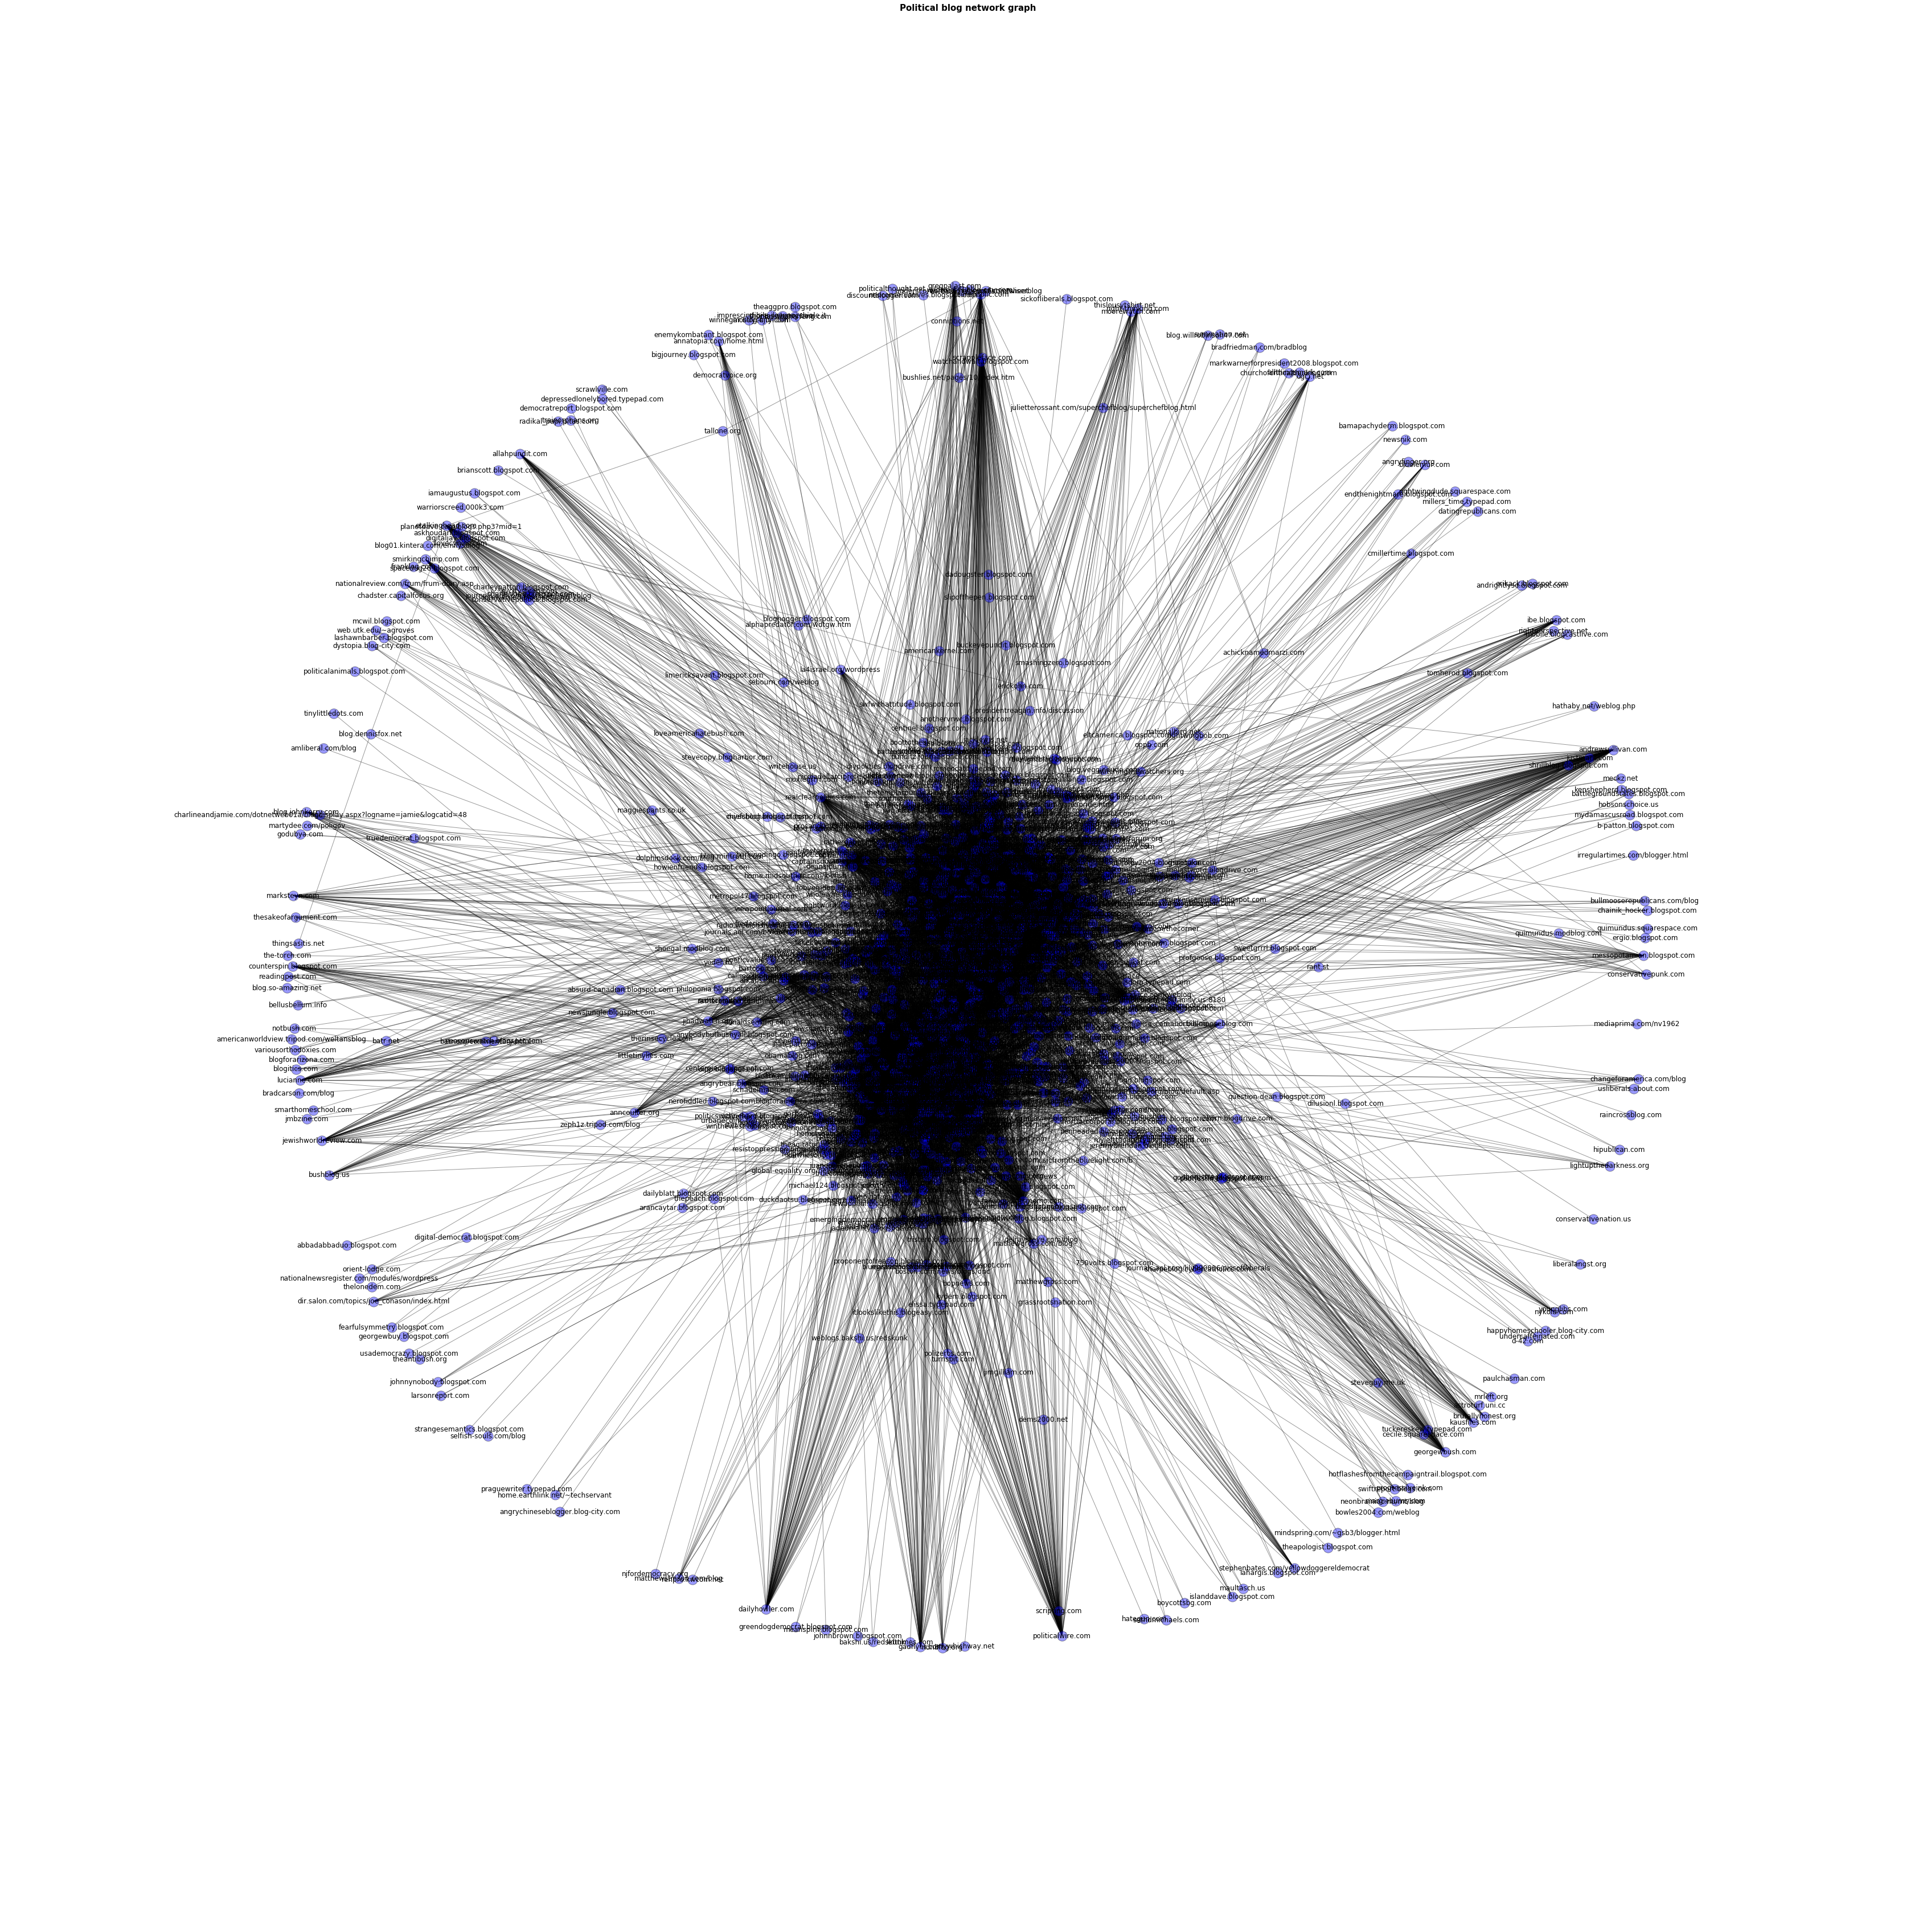

In [5]:
plt.figure(figsize=(60,60))
pos=nx.spring_layout(M, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=10)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 15}
plt.title("Political blog network graph", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2. What are the 10 most influential blogs?

In [6]:
centrality= nx.eigenvector_centrality_numpy(G)

In [7]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [8]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[(u'atrios.blogspot.com', 0.19482295898856752),
 (u'dailykos.com', 0.16090716385818696),
 (u'washingtonmonthly.com', 0.14654050463836446),
 (u'digbysblog.blogspot.com', 0.14265582251978656),
 (u'bodyandsoul.typepad.com', 0.14114853531288882),
 (u'liberaloasis.com', 0.13953785666658577),
 (u'tbogg.blogspot.com', 0.13704857535546844),
 (u'corrente.blogspot.com', 0.1294307313422498),
 (u'talkingpointsmemo.com', 0.12700931078294153),
 (u'dneiwert.blogspot.com', 0.12238703900638005)]

### 3. What are the 10 least influential blogs?

In [9]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[(u'digital-democrat.blogspot.com', 1.3254733683428827e-19),
 (u'thelonedem.com', 2.3028521621537295e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407708367e-09),
 (u'quimundus.modblog.com', 6.675725344810586e-08),
 (u'batr.org/commentary.html', 6.794245454784673e-07),
 (u'batr.net', 6.795053204382423e-07),
 (u'democratvoice.org', 1.0221602317224026e-06),
 (u'quimundus.squarespace.com', 6.056497487441803e-06),
 (u'massachusetts-liberal.com', 9.48471174661343e-06),
 (u'thingsasitis.net', 1.173702862660088e-05)]

### 4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)